In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('purchases.csv', sep = ';')
df.head()

,date,item,volume,price,market
0,2024-06-27,Плит шок Нестле 82гр Горький шоколад 70%,1.000,7.47,Амид 19мкр
1,2024-06-27,Огурцы Орзу 104,0.398,5.50,Амид 19мкр
2,2024-06-27,Огурцы Т 3960,0.394,4.95,Амид 19мкр
3,2024-06-27,Гелос 1 (492),0.306,34.90,Амид 19мкр
4,2024-06-27,Помидор 103 м,0.962,3.80,Амид 19мкр


In [3]:
df['summa'] = df['price'] * df['volume']
df

,date,item,volume,price,market,summa
0,2024-06-27,Плит шок Нестле 82гр Горький шоколад 70%,1.000,7.47,Амид 19мкр,7.4700
1,2024-06-27,Огурцы Орзу 104,0.398,5.50,Амид 19мкр,2.1890
2,2024-06-27,Огурцы Т 3960,0.394,4.95,Амид 19мкр,1.9503
3,2024-06-27,Гелос 1 (492),0.306,34.90,Амид 19мкр,10.6794
4,2024-06-27,Помидор 103 м,0.962,3.80,Амид 19мкр,3.6556
5,NaN,Болгарский 407,0.668,16.30,Амид 19мкр,10.8884
6,2024-05-17,NaN,1.000,0.20,Амид 19мкр,0.2000
7,2024-05-09,"Пряники ""Ягодка""",1.000,11.50,Доро,11.5000
8,2024-05-09,"Напиток ""Fanta"" апельсин-яблоко 1,25",1.000,9.45,Доро,9.4500
9,2024-05-09,Помидоры т/т,0.350,19.60,Доро,6.8600


In [22]:
df_sub = df[["date","summa"]].groupby('date').sum()
df_sub

,summa
date,
2024-04-29,10.5500
2024-05-09,169.5668
2024-05-17,0.2000
2024-05-29,10.2336
2024-06-27,25.9443
2024-07-15,38.0000


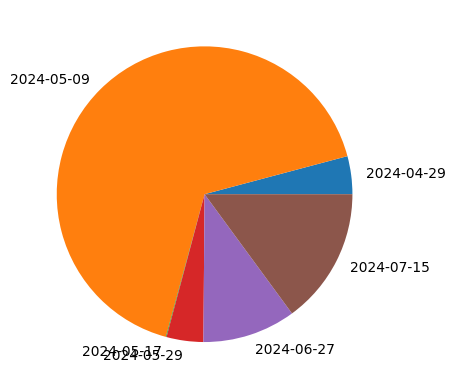

In [23]:
y = np.array(df_sub['summa'])
mylabels = df_sub.index

plt.pie(y, labels = mylabels)
plt.show() 

In [44]:
df_sub=df[["market","summa"]].groupby('market',dropna=False).sum()
df_sub

,summa
market,
Амид 19мкр,37.0327
Доро,180.1168
Оазис,38.0000
NaN,14.3836


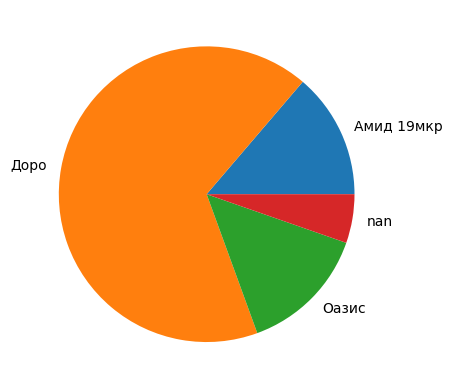

In [35]:
y = np.array(df_sub['summa'])
mylabels = df_sub.index

plt.pie(y, labels = mylabels)
plt.show() 

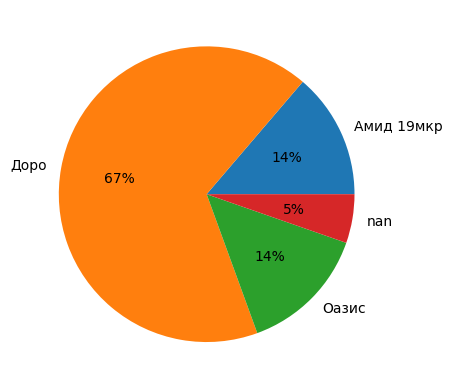

In [36]:
y = np.array(df_sub['summa'])
mylabels = df_sub.index

plt.pie(y, labels = mylabels, autopct=lambda p: '{:.0f}%'.format(p))
plt.show() 

In [37]:
total = df_sub.sum().iloc[0]
total

np.float64(269.5331)

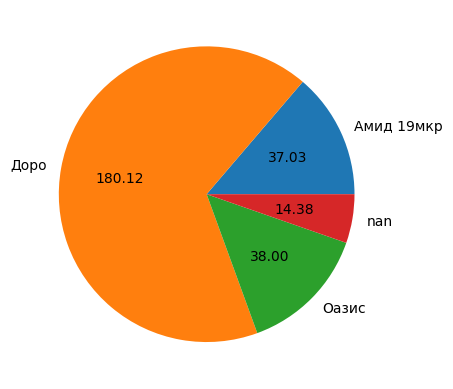

In [38]:
y = np.array(df_sub['summa'])
mylabels = df_sub.index

plt.pie(y, labels = mylabels, autopct=lambda p: '{:.2f}'.format(p * total / 100))
plt.show() 

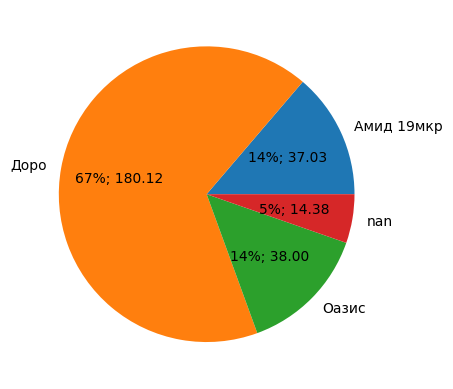

In [41]:
y = np.array(df_sub['summa'])
mylabels = df_sub.index

plt.pie(y, labels = mylabels, autopct=lambda p: '{:.0f}%; {:.2f}'.format(p, p * total / 100))
plt.show() 

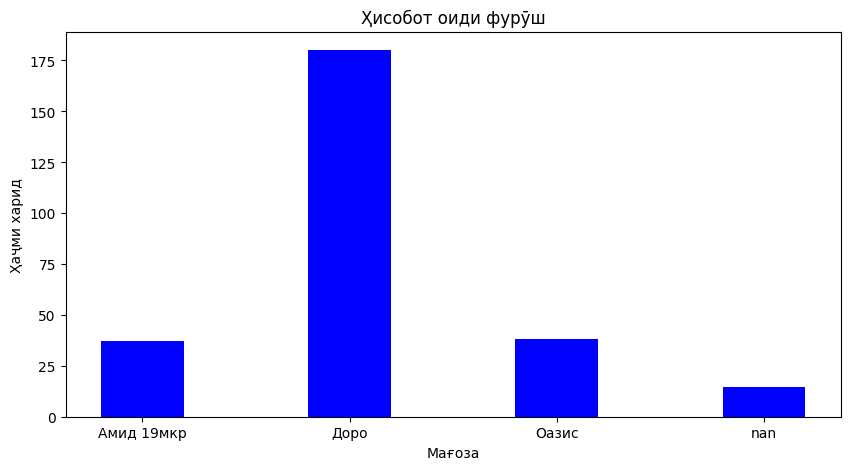

In [45]:
shops = df_sub.index.astype(str)
values = df_sub['summa']
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(shops, values, color ='blue', 
        width = 0.4)

plt.xlabel("Мағоза")
plt.ylabel("Ҳаҷми харид")
plt.title("Ҳисобот оиди фурӯш")
plt.show()